Accuracy: 0.683982683982684


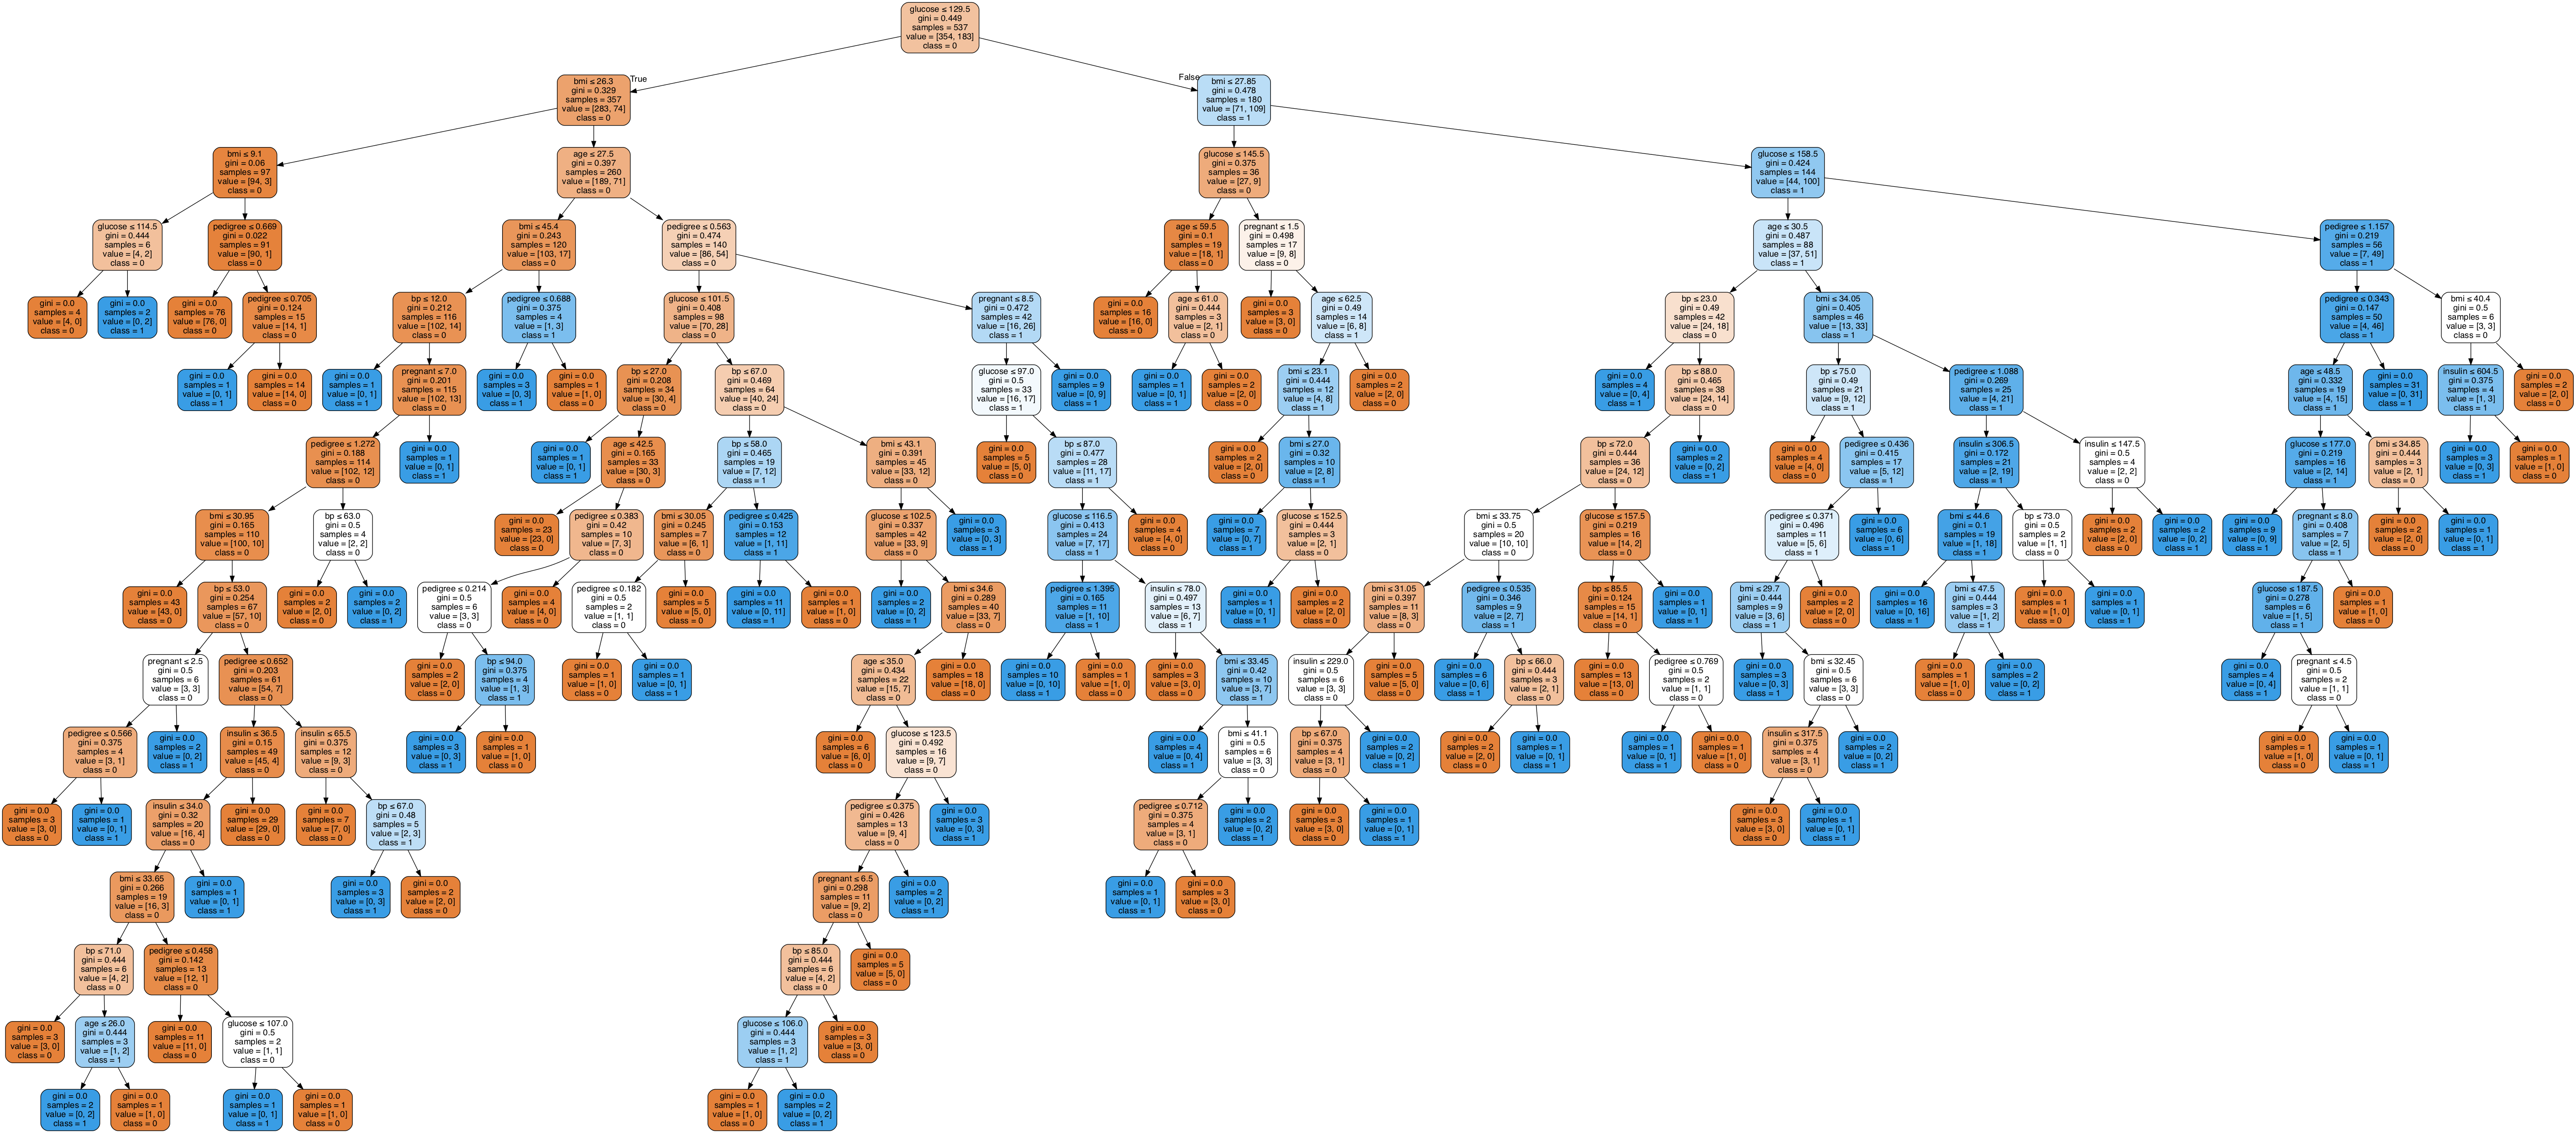

In [4]:
import sklearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
        
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("/Users/kevinvibat/Downloads/pima-diabetes.csv", header=None, names=col_names)
pima.head()

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] 
y = pima.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.tree import export_graphviz
from six import StringIO # This line of code is adapted from:https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

#Adapted from: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
